In [ ]:
# 1. Google Drive 마운트 (Colab 환경)
from google.colab import drive
drive.mount('/content/drive')

# 2. 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import holidays

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 3. 엑셀 파일 불러오기
# 파일 경로는 실제 파일 위치에 맞게 수정하세요.
file_path = '/content/drive/MyDrive/빅데이터 핀테크 교육과정/기계학습과딥러닝/refined_data_250313.xlsx'
df = pd.read_excel(file_path)

In [ ]:
# 4. 날짜 형식 변환 및 인덱스 설정
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

In [ ]:
# 5. 데이터 상태 확인 (정보, 결측치)
print("데이터 정보:")
print(df.info())
print("\n결측치 확인:")
print(df.isnull().sum())

데이터 정보:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7303 entries, 1969-01-01 to 1988-12-31
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Births     7303 non-null   int64 
 1   DayOfWeek  7303 non-null   object
dtypes: int64(1), object(1)
memory usage: 171.2+ KB
None

결측치 확인:
Births       0
DayOfWeek    0
dtype: int64


In [ ]:
# 6. 결측치 보간 (Births 컬럼에 결측치가 있을 경우)
df['Births'] = df['Births'].interpolate(method='linear')

# # 1985-10-03 / 04 데이터값 오류로 보여 삭제.

# # 7. 출산 기간에 해당하는 US Holiday 데이터 생성 (1969-1988)
# # df.index가 datetime 형식이 아닐 경우를 대비하여 pd.to_datetime()로 변환
# birth_start = pd.to_datetime(df.index.min())
# birth_end = pd.to_datetime(df.index.max())
# us_holidays_birth = holidays.UnitedStates(years=range(birth_start.year, birth_end.year + 1))
# holiday_dates_birth = [pd.to_datetime(day) for day in us_holidays_birth
#                          if (pd.to_datetime(day) >= birth_start) and (pd.to_datetime(day) <= birth_end)]

# # 8. 임신 기간 추론: 출생일에서 280일(약 9개월) 빼서 추정
# df_pregnancy = df.copy()
# df_pregnancy.index = pd.to_datetime(df_pregnancy.index) - pd.Timedelta(days=280)
# preg_start = pd.to_datetime(df_pregnancy.index.min())
# preg_end = pd.to_datetime(df_pregnancy.index.max())
# us_holidays_preg = holidays.UnitedStates(years=range(preg_start.year, preg_end.year + 1))
# holiday_dates_preg = [pd.to_datetime(day) for day in us_holidays_preg
#                       if (pd.to_datetime(day) >= preg_start) and (pd.to_datetime(day) <= preg_end)]


In [ ]:
# # 8. 두 그래프로 시각화: 상단은 출산기간, 하단은 임신기간 추론
# fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# # [그래프 1] 출산기간 (실제 출생수)
# axes[0].plot(df.index, df['Births'], label='US Births', color='blue')
# axes[0].set_title('출산기간: US Births with US Holidays')
# axes[0].set_xlabel('Date')
# axes[0].set_ylabel('Births')
# axes[0].grid(True)
# # 출산 기간에 해당하는 휴일 수직선 표시
# for hol_date in holiday_dates_birth:
#     axes[0].axvline(x=hol_date, color='red', linestyle='--', alpha=0.5)
# # (선택 사항) 몇몇 휴일 이름 주석 처리
# for hol_date, hol_name in us_holidays_birth.items():
#     hol_date = pd.to_datetime(hol_date)
#     if birth_start <= hol_date <= birth_end:
#         axes[0].annotate(hol_name, xy=(hol_date, df['Births'].max()*0.95),
#                          rotation=90, fontsize=8, color='red')

# # [그래프 2] 임신기간 추론 (출생 데이터를 280일 이동)
# axes[1].plot(df_pregnancy.index, df_pregnancy['Births'], label='Inferred Pregnancy (Births shifted by 280 days)', color='green')
# axes[1].set_title('임신기간 추론: Inferred Pregnancy Period with US Holidays')
# axes[1].set_xlabel('Date')
# axes[1].set_ylabel('Births (Shifted)')
# axes[1].grid(True)
# # 임신 기간에 해당하는 휴일 수직선 표시
# for hol_date in holiday_dates_preg:
#     axes[1].axvline(x=hol_date, color='red', linestyle='--', alpha=0.5)
# # (선택 사항) 몇몇 휴일 이름 주석 처리
# for hol_date, hol_name in us_holidays_preg.items():
#     hol_date = pd.to_datetime(hol_date)
#     if preg_start <= hol_date <= preg_end:
#         axes[1].annotate(hol_name, xy=(hol_date, df_pregnancy['Births'].max()*0.95),
#                          rotation=90, fontsize=8, color='red')

# plt.tight_layout()
# plt.show()

# # 1985-10-03, 1985-10-04 확인 필요

In [ ]:
# 8. 정상성(Stationarity) 검정: ADF (Augmented Dickey-Fuller) 테스트
adf_result = adfuller(df['Births'].dropna())
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
if adf_result[1] > 0.05:
    print("시계열이 비정상적(non-stationary)입니다. 차분(differencing) 등의 처리가 필요합니다.")
else:
    print("시계열이 정상적(stationary)입니다.")

ADF Statistic: -3.324241
p-value: 0.013829
시계열이 정상적(stationary)입니다.


In [ ]:
# 9. ARIMA Model import

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

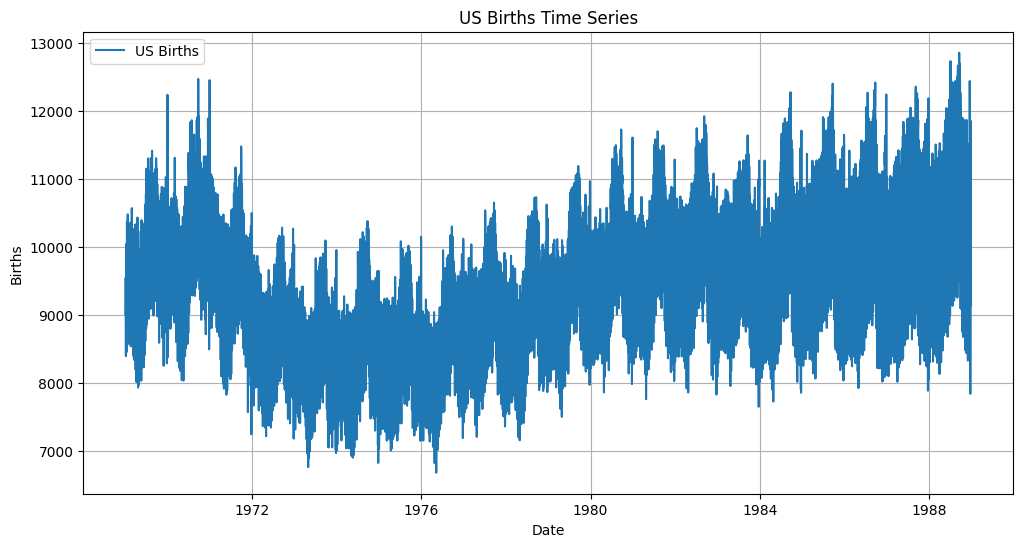

In [ ]:
# 10. 시계열 데이터 시각화
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Births'], label='US Births')
plt.title('US Births Time Series')
plt.xlabel('Date')
plt.ylabel('Births')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 11. 정상성 검정 (ADF 테스트)
adf_result = adfuller(df['Births'])
print("ADF Statistic: {:.4f}".format(adf_result[0]))
print("p-value: {:.4f}".format(adf_result[1]))
if adf_result[1] > 0.05:
    print("데이터가 비정상적(non-stationary)입니다. 차분(differencing) 등의 처리가 필요합니다.")
    d = 1  # 1차 차분 적용 예시
else:
    print("데이터가 정상적(stationary)입니다.")
    d = 0

ADF Statistic: -3.3242
p-value: 0.0138
데이터가 정상적(stationary)입니다.


In [ ]:
# 12. ARIMA 모델 생성 및 학습
# 여기서는 (p, d, q) = (1, d, 1) 예시를 사용합니다.
model = ARIMA(df['Births'], order=(1, d, 1))
model_fit = model.fit()
print(model_fit.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Births   No. Observations:                 7303
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -59140.876
Date:                Thu, 13 Mar 2025   AIC                         118289.752
Time:                        08:55:48   BIC                         118317.336
Sample:                             0   HQIC                        118299.237
                               - 7303                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9648.8035     24.051    401.178      0.000    9601.664    9695.943
ar.L1          0.2884      0.015     19.317      0.000       0.259       0.318
ma.L1          0.6733      0.010     67.848      0.0

In [ ]:
# 13. 향후 3650일 예측
forecast_steps = 3650
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_ci = forecast.conf_int()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


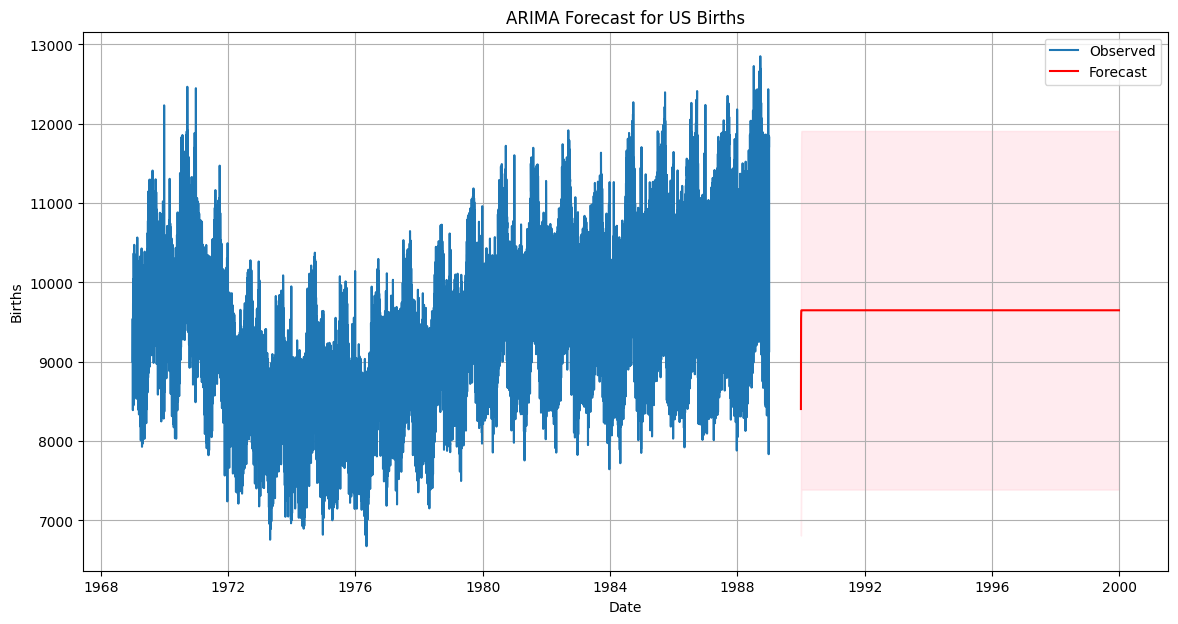

In [ ]:
# 10. 예측 결과 시각화
plt.figure(figsize=(14,7))
plt.plot(df.index, df['Births'], label='Observed')
forecast.predicted_mean.plot(label='Forecast', color='red')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Births')
plt.title('ARIMA Forecast for US Births')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
births = df['Births']

# 6. 기존 ARIMA 모델에서 사용한 차분 차수 d 결정 (예: ADF 테스트 결과에 따라)
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df['Births'])
if adf_result[1] > 0.05:
    d = 1  # 비정상적이면 1차 차분 적용
else:
    d = 0

In [ ]:
# 푸리에 항 생성 함수

def fourier_series(x, K, period):
    n = len(x)
    t = np.arange(1, n + 1)
    results = pd.DataFrame(index=x.index)
    for k in range(1, K + 1):
        results[f'sin_{k}'] = np.sin(2 * np.pi * k * t / period)
        results[f'cos_{k}'] = np.cos(2 * np.pi * k * t / period)
    return results

In [ ]:
# K에 따른 ARIMA 파라미터 사전 정의

arima_orders = {
    1: (2, 1, 3),
    2: (5, 1, 1),
    3: (3, 1, 1),
    4: (1, 1, 5),
    5: (2, 1, 0),
    6: (0, 1, 1)
}

In [ ]:
# 푸리에 오차 모델 적합 함수

def fit_arima_with_fourier(series, K, order):
    fourier_terms = fourier_series(births, K=K, period=12)

    model = SARIMAX(pd.Series(np.log(series), series.index), exog=fourier_terms, order=order, seasonal_order=(0, 0, 0, 12))
    return model.fit()

In [ ]:
models = {}
aiccs = {}

for K in range(1, 7):
    arima_order = arima_orders[K]
    model = fit_arima_with_fourier(births, K, arima_order)
    models[K] = model
    aiccs[K] = model.aicc


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/di

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/u

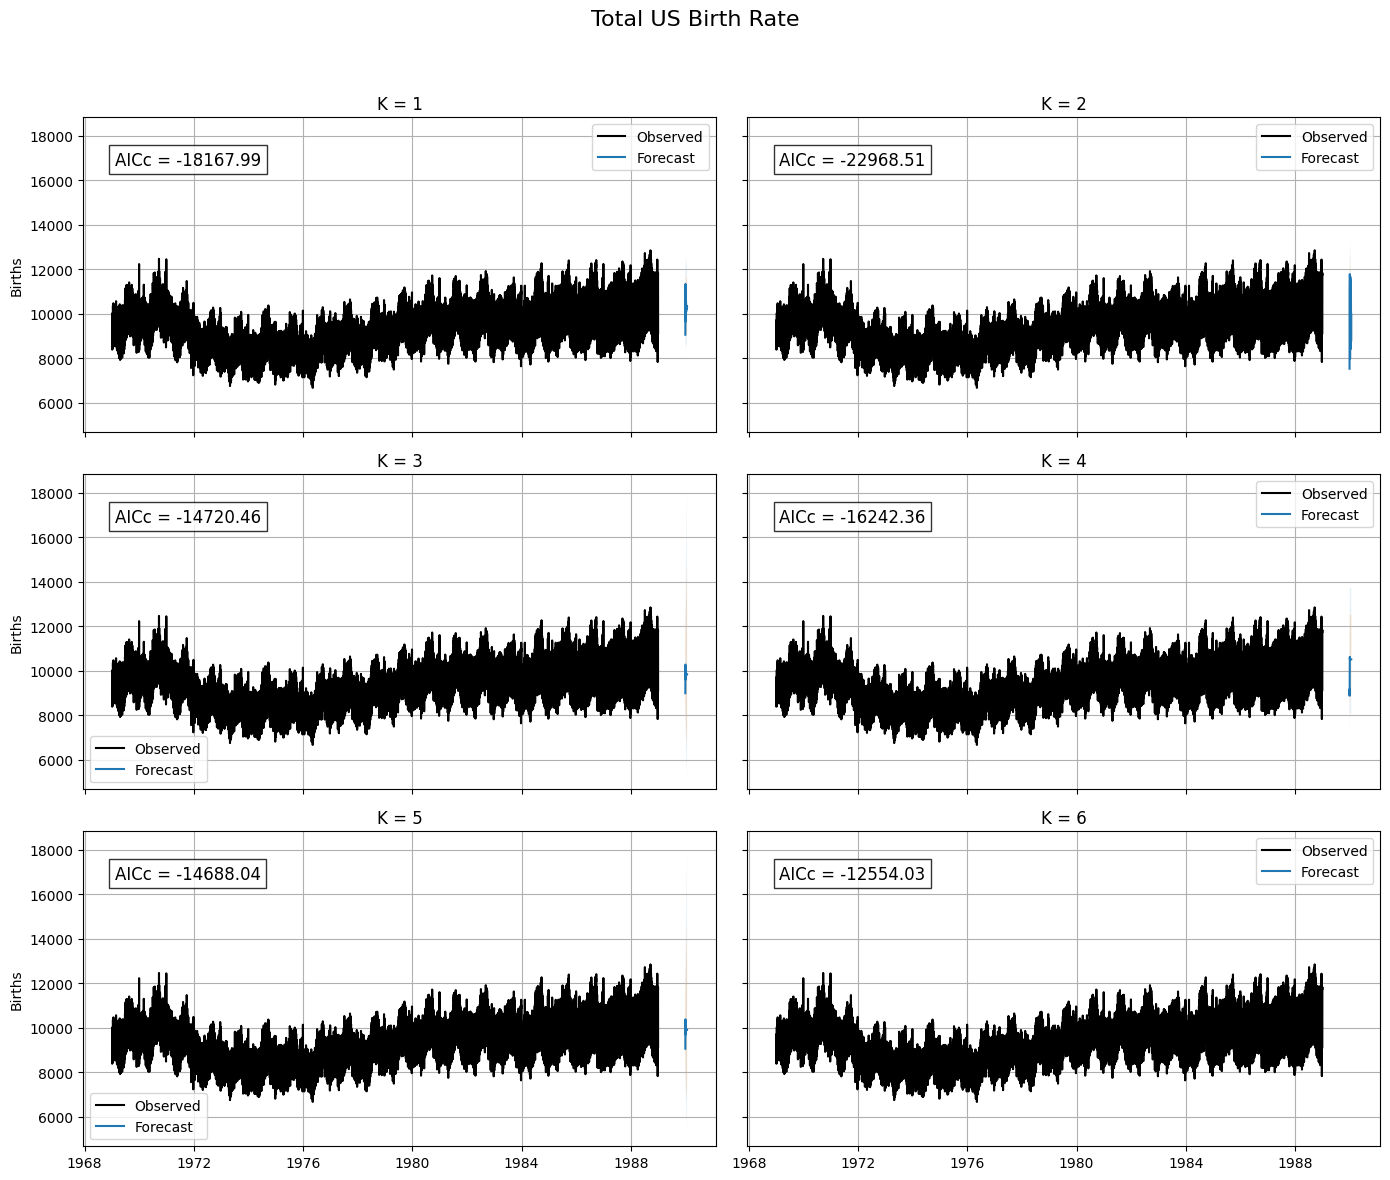

In [ ]:
future_dates = pd.date_range(births.index[-1], periods=24 + 1, freq='ME')[1:]

fig, axes = plt.subplots(3, 2, figsize=(14, 12), sharex=True, sharey=True)
axes = axes.flatten()

for i, (K, model) in enumerate(models.items()):
    ax = axes[i]

    ax.plot(births, label='Observed', color='black')

    future_fourier = fourier_series(pd.Series(future_dates), K=K, period=3650)
    forecast_result = model.get_forecast(steps=24, exog=future_fourier)
    forecast_mean = np.exp(forecast_result.predicted_mean)
    ci95 = np.exp(forecast_result.conf_int(alpha=0.05))
    ci80 = np.exp(forecast_result.conf_int(alpha=0.2))
    ax.plot(forecast_mean, label=f'Forecast')
    ax.fill_between(forecast_mean.index, ci95.iloc[:, 0], ci95.iloc[:, 1], alpha=0.1)
    ax.fill_between(forecast_mean.index, ci80.iloc[:, 0], ci80.iloc[:, 1], alpha=0.2)

    ax.text(0.05, 0.85, f'AICc = {aiccs[K]:.2f}', transform=ax.transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
    ax.set_title(f'K = {K}')
    if i % 2 == 0:
        ax.set_ylabel('Births')
    ax.legend()
    ax.grid(True)

plt.suptitle('Total US Birth Rate', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()